In [6]:
#Hello, Collaborator.
#Welcome - to the example on using my a value comparison scripts.

#Python package requirements:
#Numpy (arrays), SciPy (stats), FortranFormat(for reading and writing), PyAstronomy (air and vac conversion)

#You can install these in a conda environment or install them with pip -m install 'whatever'

#There are two main classes to consider. 

#the First is the dataset class, which has the fields: eupper, elower (both should be in cm-1), wavelength (in nm) ,avalue, loggf, j_upper, j_lower.

#The fields, avalue,loggf, j_upper,j_lower are optional and are set to empty arrays if you don't specify them.

#Suppose I have some custom data set in a file such as nist.dat in this directory.



In [7]:
#first, import the code, replacing the path with whereever you put it on your computer (realpath ideally.)
import sys
sys.path.insert(0, '/Users/leomulholland/comparing_a_values')
from compare_a_value_sets import * 

In [8]:
#If your data is in the Kurucz format, as is the file 'gf3801.lines.txt' file in this directory, it can read in with the subroutine read_kurucz

#The parameter wavelength_convert is optional, and is set to true by default. 
#By default, Kurucz data has air values for >200nm, so we convert to vac with the PyAstronomy code.

#The paramter calcualte_a_values is optional, and is set to true by default.
#By default Kurucz data has loggf, which we convert to avalues with the subroutine in the code, which I encourage you to look at it if you don't believe I have 
#correctly implemented it.

#If you are happy for either of these to be turned on, you can leave either of them out ala:
#kurucz_data = read_kurucz('gf3801.lines.txt')

#But if for some reason you want either turned off (e.g the loggf.dat from grasp^0 may already be in vaccum, you might turn off the wavelength convert here).
#e.g:
#kurucz_data = read_kurucz('gf3801.lines.txt',wavelength_convert=False)
#with similar syntax if you want to turn the avalues off. e,g calcualte_a_values=False. 
#You can also set either one to True if you want, but they're true by default.

kurucz_data_class = read_kurucz('gf3801.lines.txt')


reading in Kurucz. Note that Kurucz data has wls in air (nm) and transitions strengths in log gf.
converted  1484  wavelengths to vac
converting loggf to avalue, assuming wl is in nm and in vac.


In [9]:
#But Leo, what if I have a custom data formatlike the nist.dat file in this directory? In that case you are partially on your own. 
#I recommend using np.loadtxt.
import numpy as np 

nist_data = np.loadtxt('nist.dat')

#extract the data:
nist_wavelengths = nist_data[:,0]
nist_avalues = nist_data[:,1]
nist_lowerE = nist_data[:,3]
nist_upperE = nist_data[:,4]

#can now make the dataset class:

#the j's are only needed for converting loggf to a value. so if you already have the a values they're not necessary.
nist_data_class = dataset(eupper_wavenumber=nist_upperE,elower_wavenumber=nist_lowerE,wavelength_nm=nist_wavelengths,avalue=nist_avalues)

#if you only have loggf, you might consider doing nist_data_class.calculate_a_values().
#this WILL require the j_upper array to be supplied by the user, either in the initialisation in the command above, or with
#nist_data_class.j_upper = some_array of the correct size.


In [12]:
#To make the comparison, we use the comparison class. the only input needed are the two read in data classes.

#the left hand input is the base, righthand is the compared.
nist_kurucz_compared = comparison(nist_data_class,kurucz_data_class)

#to perform the search and calculation, use:
#where we supply numerical tolerances for matching the wavelengths and wavenumbers.
nist_kurucz_compared.calculate_comparison(tolerance_wl=0.01,tolerance_wavenumber=0.5)


#the data can be written out using:
nist_kurucz_compared.write_out_data_file(filename='example_out',label1='NIS',label2='KUR',ignore_null=False,sort_by_a_value_ratio=False)
#where the code cant find a match, it keeps the lefthand-dataset's values, and sets the right-hand set's values to something obvious.

#filename = output filename,
#label1 and 2 are the labels for the columns of the datafile.
#ignore_null, ignores any lack of matches, i.e in the comment 4 lines above.
#sort_by_a_value_ratio sorts the data in order of avalue1/avalue2
#the latter 2 are optional and are set to false by default.


there are 33 wavelengths to be compared
wavelength  674.0252  not found in compared data set
wavelength  687.0066  not found in compared data set
total wavelengths not found:  2
wavelengths found for comparisons: 31


Text(0, 0.5, 'Kurucz A value')

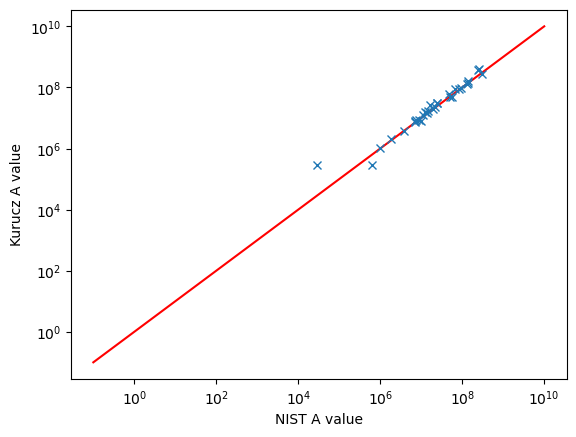

In [14]:
#where the code CAN find matches, it puts these into the field: class.compared_data, which itself as the fields:

#base == first data set
#comp == second data set
#eu,el == upper lower wavenumbers
#a == a values (loggf not yet implemented)

#nist_kurucz_compared.compared_data.base_el
#nist_kurucz_compared.compared_data.base_eu
#nist_kurucz_compared.compared_data.comp_el
#nist_kurucz_compared.compared_data.comp_eu
#nist_kurucz_compared.compared_data.base_a
#nist_kurucz_compared.compared_data.comp_a

#the above are just numpy arrays. you can make a plot with something like

x = np.logspace(-1,10,10)
import matplotlib.pyplot as plt

plt.plot(x,x,'-r')
plt.loglog(nist_kurucz_compared.compared_data.base_a,nist_kurucz_compared.compared_data.comp_a,'x')

plt.xlabel("NIST A value")
plt.ylabel("Kurucz A value")

#Direct any further questions to Leo Mulholland:
#leomulholland@hotmail.com
#lmulholland25@qub.ac.uk